# Proof of concept - Merging Landsat-2 Tiles (Sokoto)

In [3]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
import glob
import os

In [4]:
# File and folder paths
dirpath = r"data/sentinel2"
out_fp = r"data/sentinel2/sokoto_merged.jp2"
# Make a search criteria to select the DEM files
search_criteria = "*/R10m/transformed_tci.jp2"
q = os.path.join(dirpath, search_criteria)
print(q)

data/sentinel2\*/R10m/transformed_tci.jp2


In [5]:
filenames = glob.glob(q)
filenames

['data/sentinel2\\31PFP,2021-06-14,0\\R10m\\transformed_tci.jp2',
 'data/sentinel2\\31PFQ,2021-06-14,0\\R10m\\transformed_tci.jp2',
 'data/sentinel2\\31PFR,2021-06-14,0\\R10m\\transformed_tci.jp2',
 'data/sentinel2\\31PGP,2021-06-14,0\\R10m\\transformed_tci.jp2',
 'data/sentinel2\\31PGQ,2021-06-14,0\\R10m\\transformed_tci.jp2',
 'data/sentinel2\\31PGR,2021-06-14,0\\R10m\\transformed_tci.jp2',
 'data/sentinel2\\31PHP,2021-06-14,0\\R10m\\transformed_tci.jp2',
 'data/sentinel2\\31PHQ,2021-06-14,0\\R10m\\transformed_tci.jp2',
 'data/sentinel2\\31PHR,2021-06-14,0\\R10m\\transformed_tci.jp2']

In [6]:
files_to_mosaic = []

In [7]:
for filename in filenames:
    file = rasterio.open(filename)
    files_to_mosaic.append(file)

In [8]:
files_to_mosaic

[<open DatasetReader name='data/sentinel2\31PFP,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>,
 <open DatasetReader name='data/sentinel2\31PFQ,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>,
 <open DatasetReader name='data/sentinel2\31PFR,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>,
 <open DatasetReader name='data/sentinel2\31PGP,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>,
 <open DatasetReader name='data/sentinel2\31PGQ,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>,
 <open DatasetReader name='data/sentinel2\31PGR,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>,
 <open DatasetReader name='data/sentinel2\31PHP,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>,
 <open DatasetReader name='data/sentinel2\31PHQ,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>,
 <open DatasetReader name='data/sentinel2\31PHR,2021-06-14,0\R10m\transformed_tci.jp2' mode='r'>]

In [9]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(files_to_mosaic)

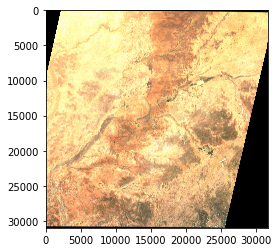

<AxesSubplot:>

In [10]:
show(mosaic)

In [11]:
out_meta = files_to_mosaic[0].meta.copy()
out_meta.update({"driver": "JP2OpenJPEG",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans,
                })

In [12]:
# Write the mosaic raster to disk
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)